# Assignment 7 
Halka Hanna


In [49]:
import pandas as pd
from matplotlib import pyplot as plt

---
## Daily Temperature

In [50]:
tempt = pd.read_csv('../data/daily_tempt.csv')
tempt['data_ind'] = tempt['Date']
tempt = tempt.set_index('data_ind')
tempt.index = pd.to_datetime(tempt.index)

train_df = tempt.loc[tempt.index < '1988-01-01']
val_df = tempt.loc[tempt.index >= '1988-01-01']

train = train_df[['mean-tempt']].reset_index()
train['unique_id'] = 'tempt'
train.rename(columns={'data_ind': 'ds', 'mean-tempt': 'y'}, inplace=True)
train_tempt = train[['unique_id', 'ds', 'y']]

val = val_df[['mean-tempt']].reset_index()
val['unique_id'] = 'tempt'
val.rename(columns={'data_ind': 'ds', 'mean-tempt': 'y'}, inplace=True)
val_tempt = val[['unique_id', 'ds', 'y']]

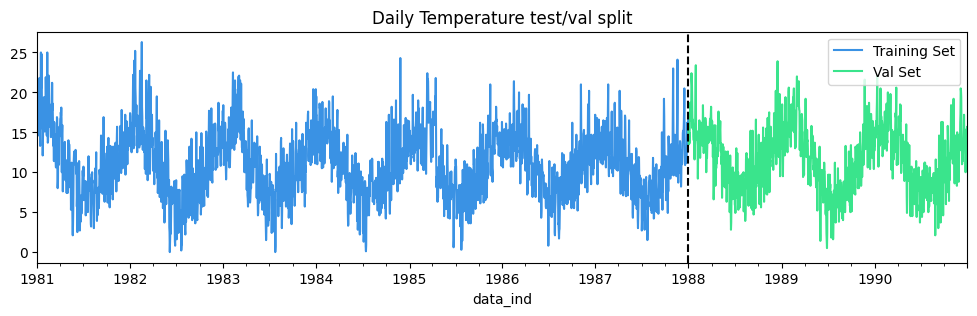

In [51]:
y_train = train_df['mean-tempt']
y_val = val_df['mean-tempt']

fig, ax = plt.subplots(figsize=(12, 3))
y_train.plot(ax=ax, label='Training Set', title='Daily Temperature test/val split', color='#3A92E4')
y_val.plot(ax=ax, label='Val Set', color='#3AE48C')
ax.axvline('1988-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Val Set'])
plt.show()

---
## Weekly CO2


In [52]:
co2 = pd.read_csv('../data/weekly_co2.csv')
co2 = co2[['Date', 'average']]
co2['data_ind'] = co2['Date']
co2 = co2.set_index('data_ind')
co2.index = pd.to_datetime(co2.index)

train_df = co2.loc[co2.index < '2015-07-05']
val_df = co2.loc[co2.index >= '2015-07-05']

train = train_df[['average']].reset_index()
train['unique_id'] = 'co2'
train.rename(columns={'data_ind': 'ds', 'average': 'y'}, inplace=True)
train_co2 = train[['unique_id', 'ds', 'y']]

val = val_df[['average']].reset_index()
val['unique_id'] = 'co2'
val.rename(columns={'data_ind': 'ds', 'average': 'y'}, inplace=True)
val_co2 = val[['unique_id', 'ds', 'y']]

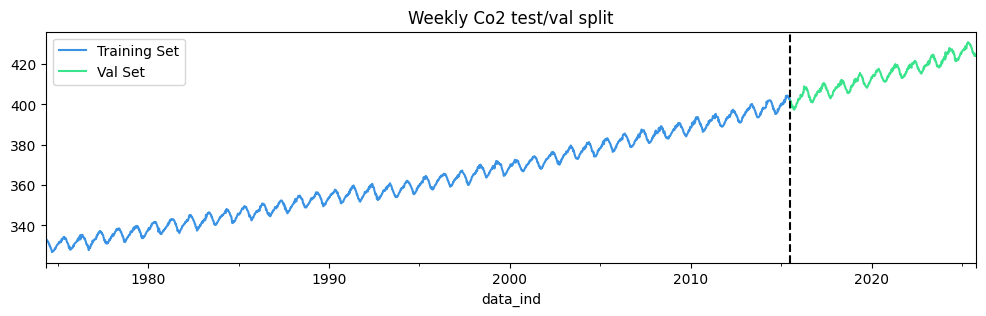

In [53]:
y_train = train_df['average']
y_val = val_df['average']

fig, ax = plt.subplots(figsize=(12, 3))
y_train.plot(ax=ax, label='Training Set', title='Weekly Co2 test/val split', color='#3A92E4')
y_val.plot(ax=ax, label='Val Set', color='#3AE48C')
ax.axvline('2015-07-05', color='black', ls='--')
ax.legend(['Training Set', 'Val Set'])
plt.show()

---
## Hourly AEP

In [55]:
aep = pd.read_csv('../data/hourly_aep.csv')
aep['data_ind'] = aep['Date']
aep = aep.set_index('data_ind')
aep.index = pd.to_datetime(aep.index)

train_df = aep.loc[aep.index < '2015-10-27 06:00:00']
val_df = aep.loc[aep.index >= '2015-10-27 06:00:00']

train = train_df[['AEP_MW']].reset_index()
train['unique_id'] = 'mw'
train.rename(columns={'data_ind': 'ds', 'AEP_MW': 'y'}, inplace=True)
train_aep = train[['unique_id', 'ds', 'y']]

val = val_df[['AEP_MW']].reset_index()
val['unique_id'] = 'mw'
val.rename(columns={'data_ind': 'ds', 'AEP_MW': 'y'}, inplace=True)
val_aep = val[['unique_id', 'ds', 'y']]

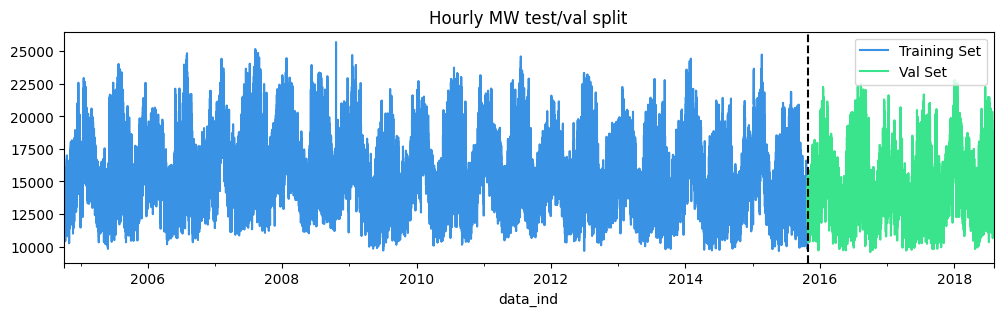

In [56]:
y_train = train_df['AEP_MW']
y_val = val_df['AEP_MW']

fig, ax = plt.subplots(figsize=(12, 3))
y_train.plot(ax=ax, label='Training Set', title='Hourly MW test/val split', color='#3A92E4')
y_val.plot(ax=ax, label='Val Set', color='#3AE48C')
ax.axvline('2015-10-27 06:00:00', color='black', ls='--')
ax.legend(['Training Set', 'Val Set'])
plt.show()

In [57]:
from prophet import Prophet
m = Prophet()
m.add_country_holidays(country_name='US')

---